# Research Question

To detect Hate Tweets by implementing Machine Learning Algorithms with different vectorizers

# Project Introduction

Before implementing ML algorithms, Data Cleaning is done. I have used 4 different ML algorithms (Logistic Regression,Decision Tree,Random Forest and Gradient Boosting). Grid Search or Random Search are done for algorithms. I couldn't select all data because of MMO issues. That's why I tried with 1000 and 2000 Features. Finally, I had different results with respect to models, vectorizers and number of features and I compared them.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from collections import Counter
import nltk
import spacy
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [4]:
df2=df.copy()

In [5]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [6]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

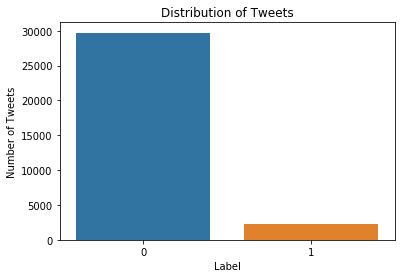

In [7]:
sns.countplot(df.label)
plt.title('Distribution of Tweets')
plt.xlabel('Label')
plt.ylabel('Number of Tweets')
plt.show()

In [8]:
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?[\]]", "", text)
    text = re.sub(r"(\b|\s+\-?|^\-?)(\d+|\d*\.\d+)\b", " ", text)
    text = ' '.join(text.split())
    return text

In [9]:
df2['tweet']=df2['tweet'].apply(text_cleaner)

In [10]:
df2

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to w...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


# Stop Words Removal 

In [11]:
stop= stopwords.words('english')

In [12]:
df2['tweet'] = df2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
df2

,id,label,tweet
0,1,0,@user father dysfunctional selfish drags kids ...
1,2,0,@user @user thanks #lyft credit can't use caus...
2,3,0,bihday majesty
3,4,0,#model love u take u time urð±!!! ððð...
4,5,0,factsguide: society #motivation
...,...,...,...
31957,31958,0,ate @user isz youuu?ððððððð...
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,"@user #sikh #temple vandalised #calgary, #wso ..."


# Punctuation Removal

In [14]:
df2['tweet'] = df2['tweet'].str.replace('[^\w\s]','')

In [15]:
df2

,id,label,tweet
0,1,0,user father dysfunctional selfish drags kids d...
1,2,0,user user thanks lyft credit cant use cause of...
2,3,0,bihday majesty
3,4,0,model love u take u time urð ðððð ððð
4,5,0,factsguide society motivation
...,...,...,...
31957,31958,0,ate user isz youuuðððððððððâï
31958,31959,0,see nina turner airwaves trying wrap mantle ge...
31959,31960,0,listening sad songs monday morning otw work sad
31960,31961,1,user sikh temple vandalised calgary wso condem...


# Frequent Words Removal 

In [16]:
frequent_words = pd.Series(' '.join(df2['tweet']).split()).value_counts()[:10]
frequent_words

user     17473
love      2647
ð         2515
day       2200
â         1794
happy     1663
amp       1590
im        1139
u         1136
time      1110
dtype: int64

In [17]:
df_freq=pd.DataFrame(frequent_words,columns=['Numbers'])

In [18]:
df_freq=df_freq.reset_index()

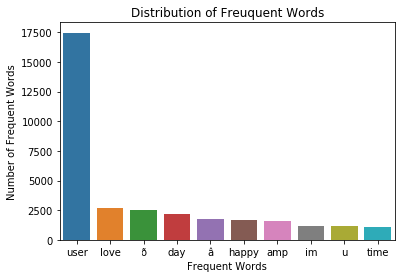

In [19]:
sns.barplot(x = 'index', y = 'Numbers', data = df_freq)
plt.title('Distribution of Freuquent Words')
plt.xlabel('Frequent Words')
plt.ylabel('Number of Frequent Words')
plt.show()

In [20]:
df2['tweet'] = df2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in frequent_words))

In [21]:
df2.head()

,id,label,tweet
0,1,0,father dysfunctional selfish drags kids dysfun...
1,2,0,thanks lyft credit cant use cause offer wheelc...
2,3,0,bihday majesty
3,4,0,model take urð ðððð ððð
4,5,0,factsguide society motivation


# Rare Words Removal

In [22]:
rare_words = pd.Series(" ".join(df2['tweet']).split()).value_counts()[-30:]

In [23]:
rare_words

riggedprimary           1
instadairyâ             1
murrayhaters            1
liketeam                1
clonakilty              1
grandchildren           1
sayingimagescom         1
dayso                   1
ilk                     1
nw                      1
soonkeonn               1
beardhat                1
furfamily               1
oddmomout               1
removedhis              1
weddingâ                1
barceloneta             1
ney                     1
unitedstateschampion    1
sisterslove             1
ðmany                   1
unnecessarily           1
everyonâ                1
yb                      1
meted                   1
horsemen                1
havingagoodtime         1
pension                 1
breatheinfitness        1
examresultsâ            1
dtype: int64

In [24]:
df2['tweet'] = df2['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in rare_words))

# Word Count

In [25]:
df2['word_count'] = df2['tweet'].apply(lambda x : len(str(x).split(" ")))

In [26]:
df2

,id,label,tweet,word_count
0,1,0,father dysfunctional selfish drags kids dysfun...,7
1,2,0,thanks lyft credit cant use cause offer wheelc...,12
2,3,0,bihday majesty,2
3,4,0,model take urð ðððð ððð,5
4,5,0,factsguide society motivation,3
...,...,...,...,...
31957,31958,0,ate isz youuuðððððððððâï,3
31958,31959,0,see nina turner airwaves trying wrap mantle ge...,14
31959,31960,0,listening sad songs monday morning otw work sad,8
31960,31961,1,sikh temple vandalised calgary wso condemns act,7


# Removing all except Letters

In [27]:
df2['tweet'] = df2['tweet'].str.replace("[^a-zA-Z]", " ")
df2

,id,label,tweet,word_count
0,1,0,father dysfunctional selfish drags kids dysfun...,7
1,2,0,thanks lyft credit cant use cause offer wheelc...,12
2,3,0,bihday majesty,2
3,4,0,model take ur,5
4,5,0,factsguide society motivation,3
...,...,...,...,...
31957,31958,0,ate isz youuu,3
31958,31959,0,see nina turner airwaves trying wrap mantle ge...,14
31959,31960,0,listening sad songs monday morning otw work sad,8
31960,31961,1,sikh temple vandalised calgary wso condemns act,7


# Lower Case

In [19]:
# df2['Title_lower']='title'

In [21]:
# df2['Title_lower'] = df2['Title'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Tokenization

In [28]:
nlp = spacy.load('en_core_web_sm')

In [29]:
df2['tweet']=df2['tweet'].apply(nlp)

In [30]:
df2.head()

,id,label,tweet,word_count
0,1,0,"(father, dysfunctional, selfish, drags, kids, ...",7
1,2,0,"(thanks, lyft, credit, ca, nt, use, cause, off...",12
2,3,0,"(bihday, majesty)",2
3,4,0,"(model, take, ur, )",5
4,5,0,"(factsguide, society, motivation)",3


# Lemmatization

In [31]:
for i, word in enumerate(df2['tweet']):
    df2.loc[i, "tweet"] = " ".join([token.lemma_ for token in word if not token.is_punct and not token.is_stop])

In [32]:
df2.head()

,id,label,tweet,word_count
0,1,0,father dysfunctional selfish drag kid dysfunct...,7
1,2,0,thanks lyft credit not use cause offer wheelch...,12
2,3,0,bihday majesty,2
3,4,0,model ur,5
4,5,0,factsguide society motivation,3


In [40]:
df4=df2.copy()

In [41]:
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
vectorizer = CountVectorizer(max_features=1000,analyzer='word')
vector = vectorizer.fit_transform(df2["tweet"])

In [43]:
X = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

In [44]:
y=df4['label']

In [45]:
df_last=pd.concat([X, y], axis=1)

In [46]:
df_last

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yo,yoga,york,young,youth,youtube,yr,yrs,yummy,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Resampling Train

In [47]:
from sklearn.utils import resample

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

In [50]:
df_train=pd.concat([X_train, y_train], axis=1)

In [51]:
normal_tweets = df_train[df_last.label == 0]
racist_tweets = df_train[df_last.label == 1]

racist_tweets_upsampled = resample(racist_tweets,
                                         replace = True,
                                         n_samples = len(normal_tweets),
                                         random_state = 111)

upsampled_df = pd.concat([normal_tweets, racist_tweets_upsampled],ignore_index=True )
upsampled_df.label.value_counts()

1    23760
0    23760
Name: label, dtype: int64

In [52]:
upsampled_df

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yo,yoga,york,young,youth,youtube,yr,yrs,yummy,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

# Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [55]:
def log_reg(X_train,y_train,X_test,y_test):
    params = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1,1,10, 100]}
    logreg = LogisticRegression()

    grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = params,
                       cv = 3)
    grid_cv.fit(X_train, y_train)
    best_grid_cv=grid_cv.best_estimator_
    pred_test = best_grid_cv.predict(X_test)
    print('Best Parameters :', grid_cv.best_params_)
    print('Best GridSearch Train Score :', best_grid_cv.score(X_train, y_train))
    print('Best GridSearch Test Score :', best_grid_cv.score(X_test,y_test))
    print(classification_report(y_test, pred_test))

In [56]:
log_reg(X_train,y_train,X_test,y_test)

Best Parameters : {'C': 100, 'penalty': 'l2'}
Best GridSearch Train Score : 0.891456228956229
Best GridSearch Test Score : 0.8235570154856875
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5960
           1       0.25      0.80      0.38       433

    accuracy                           0.82      6393
   macro avg       0.62      0.81      0.64      6393
weighted avg       0.93      0.82      0.86      6393



# DecisionTreeClassifier

In [57]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
def dec_tree(X_train,y_train,X_test,y_test):    
    params= {'criterion':['gini', 'entropy'],'splitter':['best','random'],'max_depth':[3,5,7]}
    
    dec_tree=DecisionTreeClassifier()
    grid_decision_tree=GridSearchCV(dec_tree, param_grid=params, cv=3)
    grid_decision_tree.fit(X_train,y_train)
    
    best_grid_decision_tree=grid_decision_tree.best_estimator_
    pred_test = best_grid_decision_tree.predict(X_test)
    print('Best Parameters :', grid_decision_tree.best_params_)
    print('Best GridSearch Train Score :', best_grid_decision_tree.score(X_train,y_train))
    print('Best GridSearch Test Score :', best_grid_decision_tree.score(X_test,y_test))
    print(classification_report(y_test, pred_test))

In [60]:
dec_tree(X_train,y_train,X_test,y_test)

Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
Best GridSearch Train Score : 0.653766835016835
Best GridSearch Test Score : 0.9452526200531832
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5960
           1       0.69      0.35      0.46       433

    accuracy                           0.95      6393
   macro avg       0.82      0.67      0.72      6393
weighted avg       0.94      0.95      0.94      6393



# Random Forest 

In [61]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
from sklearn.model_selection import RandomizedSearchCV

In [64]:
def random_forest(X_train,y_train,X_test,y_test):
    params= {'n_estimators':[50,75,100],'criterion':['gini', 'entropy'],'max_depth':[3,4,5] }
    
    rndm_frst = RandomForestClassifier()

    random_rsv = RandomizedSearchCV(estimator=rndm_frst,
                           param_distributions = params,
                           cv = 3,
                           random_state = 111)

    random_rsv.fit(X_train, y_train)
    best_random_rsv=random_rsv.best_estimator_
    pred_test = best_random_rsv.predict(X_test)
    print('Best Parameters :', random_rsv.best_params_)
    print('Best RandomSearch Train Score :', best_random_rsv.score(X_train,y_train))
    print('Best RandomSearch Test Score :', best_random_rsv.score(X_test,y_test))
    print(classification_report(y_test, pred_test))

In [65]:
random_forest(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}
Best RandomSearch Train Score : 0.7373737373737373
Best RandomSearch Test Score : 0.9379008290317535
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5960
           1       0.54      0.53      0.54       433

    accuracy                           0.94      6393
   macro avg       0.75      0.75      0.75      6393
weighted avg       0.94      0.94      0.94      6393



# Gradient-Boosting

In [66]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
def grandient_boosting(X_train,y_train,X_test,y_test):
    params= {'learning_rate':[0.1,0.3],'n_estimators':[50,100],'min_samples_leaf':[1,5]}
    
    grad_boosting = GradientBoostingClassifier()
    
    gradient_boosting_rsv = RandomizedSearchCV(estimator=grad_boosting,
                           param_distributions = params,
                           cv = 3,
                           random_state = 111)

    gradient_boosting_rsv.fit(X_train, y_train)
    best_gradient_boosting_rsv=gradient_boosting_rsv.best_estimator_  
    pred_test = best_gradient_boosting_rsv.predict(X_test)
    print('Best Parameters :', gradient_boosting_rsv.best_params_)
    print('Best RandomSearch Train Score :', best_gradient_boosting_rsv.score(X_train,y_train))
    print('Best RandomSearch Test Score :', best_gradient_boosting_rsv.score(X_test,y_test))
    print(classification_report(y_test, pred_test))

In [69]:
grandient_boosting(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 0.3}
Best RandomSearch Train Score : 0.8069654882154882
Best RandomSearch Test Score : 0.9244486156733928
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      5960
           1       0.46      0.66      0.54       433

    accuracy                           0.92      6393
   macro avg       0.72      0.80      0.75      6393
weighted avg       0.94      0.92      0.93      6393



# N-grams (n=2)

In [70]:
vectorizer = CountVectorizer(max_features=1000,analyzer='word',ngram_range=(2,2))
vector = vectorizer.fit_transform(df2["tweet"])

In [71]:
X = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

In [72]:
y=df4['label']

In [73]:
df_last=pd.concat([X, y], axis=1)

# Resampling Train

In [74]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

In [75]:
df_train=pd.concat([X_train, y_train], axis=1)

In [76]:
normal_tweets = df_train[df_last.label == 0]
racist_tweets = df_train[df_last.label == 1]

racist_tweets_upsampled = resample(racist_tweets,
                                         replace = True,
                                         n_samples = len(normal_tweets),
                                         random_state = 111)

upsampled_df = pd.concat([normal_tweets, racist_tweets_upsampled],ignore_index=True )
upsampled_df.label.value_counts()

1    23760
0    23760
Name: label, dtype: int64

In [77]:
upsampled_df

,abrahamhick lawofattraction,accept sale,acne altwaystoheal,act like,actor seeklearne,adapt environment,add follow,allow child,alternatively idwp,altwaystoheal healing,...,year anniversary,year internalize,year later,year not,year old,yes yes,youtube video,yr old,yrs ago,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [78]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

# Logistic regression

In [80]:
log_reg(X_train,y_train,X_test,y_test)

Best Parameters : {'C': 10, 'penalty': 'l2'}
Best GridSearch Train Score : 0.6411616161616162
Best GridSearch Test Score : 0.3347411231033943
              precision    recall  f1-score   support

           0       0.99      0.29      0.45      5960
           1       0.09      0.98      0.17       433

    accuracy                           0.33      6393
   macro avg       0.54      0.63      0.31      6393
weighted avg       0.93      0.33      0.43      6393



# DecisionTreeClassifier

In [81]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [83]:
dec_tree(X_train,y_train,X_test,y_test)

Best Parameters : {'criterion': 'gini', 'max_depth': 5, 'splitter': 'best'}
Best GridSearch Train Score : 0.5315025252525253
Best GridSearch Test Score : 0.9369623025183795
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       1.00      0.07      0.13       433

    accuracy                           0.94      6393
   macro avg       0.97      0.53      0.55      6393
weighted avg       0.94      0.94      0.91      6393



# Random Forest 

In [84]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [86]:
random_forest(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}
Best RandomSearch Train Score : 0.5715488215488216
Best RandomSearch Test Score : 0.9391521977162521
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       0.75      0.15      0.25       433

    accuracy                           0.94      6393
   macro avg       0.85      0.57      0.61      6393
weighted avg       0.93      0.94      0.92      6393



# Gradient-Boosting

In [87]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [89]:
grandient_boosting(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 0.3}
Best RandomSearch Train Score : 0.5921506734006734
Best RandomSearch Test Score : 0.9407164085718754
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       0.77      0.18      0.29       433

    accuracy                           0.94      6393
   macro avg       0.86      0.59      0.63      6393
weighted avg       0.93      0.94      0.92      6393



# TfidfVectorizer

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [91]:
vectorizer = TfidfVectorizer(max_features=1000,max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True)

In [92]:
vector = vectorizer.fit_transform(df2["tweet"])
X = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
X.head()

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yesterday,yo,yoga,york,young,youth,youtube,yr,yrs,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [93]:
X.shape

(31962, 1000)

In [94]:
y=df4['label']

In [95]:
y.shape

(31962,)

In [96]:
df_last=pd.concat([X, y], axis=1)

# Resampling Train

In [97]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

In [98]:
df_train=pd.concat([X_train, y_train], axis=1)

In [99]:
normal_tweets = df_train[df_last.label == 0]
racist_tweets = df_train[df_last.label == 1]

racist_tweets_upsampled = resample(racist_tweets,
                                         replace = True,
                                         n_samples = len(normal_tweets),
                                         random_state = 111)

upsampled_df = pd.concat([normal_tweets, racist_tweets_upsampled],ignore_index=True )
upsampled_df.label.value_counts()

1    23760
0    23760
Name: label, dtype: int64

In [100]:
upsampled_df

,able,absolutely,accept,account,act,action,actor,actually,adapt,add,...,yo,yoga,york,young,youth,youtube,yr,yrs,yummy,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [101]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

# Logistic regression

In [103]:
log_reg(X_train,y_train,X_test,y_test)

Best Parameters : {'C': 100, 'penalty': 'l2'}
Best GridSearch Train Score : 0.8902777777777777
Best GridSearch Test Score : 0.8232441733145628
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      5960
           1       0.25      0.80      0.38       433

    accuracy                           0.82      6393
   macro avg       0.62      0.81      0.64      6393
weighted avg       0.93      0.82      0.86      6393



# DecisionTreeClassifier

In [104]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [106]:
dec_tree(X_train,y_train,X_test,y_test)

Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
Best GridSearch Train Score : 0.654145622895623
Best GridSearch Test Score : 0.9440012513686845
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5960
           1       0.67      0.33      0.45       433

    accuracy                           0.94      6393
   macro avg       0.81      0.66      0.71      6393
weighted avg       0.93      0.94      0.94      6393



# Random Forest 

In [107]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [109]:
random_forest(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'max_depth': 4, 'criterion': 'gini'}
Best RandomSearch Train Score : 0.7258207070707071
Best RandomSearch Test Score : 0.9369623025183795
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      5960
           1       0.54      0.50      0.52       433

    accuracy                           0.94      6393
   macro avg       0.75      0.73      0.74      6393
weighted avg       0.94      0.94      0.94      6393



# Gradient-Boosting

In [110]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [112]:
grandient_boosting(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 0.3}
Best RandomSearch Train Score : 0.8469276094276095
Best RandomSearch Test Score : 0.924135773502268
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5960
           1       0.46      0.67      0.54       433

    accuracy                           0.92      6393
   macro avg       0.72      0.81      0.75      6393
weighted avg       0.94      0.92      0.93      6393



# TfidfVectorizer (2-grams)

In [113]:
vectorizer = TfidfVectorizer(max_features=1000, max_df=0.5, min_df=2, use_idf=True, norm=u'l2', smooth_idf=True, ngram_range=(2,2))

In [114]:
vector = vectorizer.fit_transform(df2["tweet"])

X = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())
X.head()

,abrahamhick lawofattraction,accept sale,acne altwaystoheal,act like,actor seeklearne,adapt environment,add follow,allow child,altwaystoheal healing,altwaystoheal healthy,...,year ago,year anniversary,year internalize,year later,year not,year old,yes yes,youtube video,yr old,yrs ago
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X.shape

(31962, 1000)

In [116]:
y=df4['label']

In [117]:
y.shape

(31962,)

In [118]:
df_last=pd.concat([X, y], axis=1)

# Resampling Train

In [119]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

In [120]:
df_train=pd.concat([X_train, y_train], axis=1)

In [121]:
normal_tweets = df_train[df_last.label == 0]
racist_tweets = df_train[df_last.label == 1]

racist_tweets_upsampled = resample(racist_tweets,
                                         replace = True,
                                         n_samples = len(normal_tweets),
                                         random_state = 111)

upsampled_df = pd.concat([normal_tweets, racist_tweets_upsampled],ignore_index=True )
upsampled_df.label.value_counts()

1    23760
0    23760
Name: label, dtype: int64

In [122]:
upsampled_df

,abrahamhick lawofattraction,accept sale,acne altwaystoheal,act like,actor seeklearne,adapt environment,add follow,allow child,altwaystoheal healing,altwaystoheal healthy,...,year anniversary,year internalize,year later,year not,year old,yes yes,youtube video,yr old,yrs ago,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
47518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [123]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

# Logistic regression

In [125]:
log_reg(X_train,y_train,X_test,y_test)

Best Parameters : {'C': 100, 'penalty': 'l2'}
Best GridSearch Train Score : 0.6412878787878787
Best GridSearch Test Score : 0.33552322853120603
              precision    recall  f1-score   support

           0       0.99      0.29      0.45      5960
           1       0.09      0.98      0.17       433

    accuracy                           0.34      6393
   macro avg       0.54      0.63      0.31      6393
weighted avg       0.93      0.34      0.43      6393



# DecisionTreeClassifier

In [126]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [128]:
dec_tree(X_train,y_train,X_test,y_test)

Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'splitter': 'random'}
Best GridSearch Train Score : 0.5315025252525253
Best GridSearch Test Score : 0.9369623025183795
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       1.00      0.07      0.13       433

    accuracy                           0.94      6393
   macro avg       0.97      0.53      0.55      6393
weighted avg       0.94      0.94      0.91      6393



# Random Forest 

In [129]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [131]:
random_forest(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'max_depth': 5, 'criterion': 'entropy'}
Best RandomSearch Train Score : 0.5715698653198653
Best RandomSearch Test Score : 0.9380572501173158
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      5960
           1       0.75      0.13      0.22       433

    accuracy                           0.94      6393
   macro avg       0.85      0.56      0.59      6393
weighted avg       0.93      0.94      0.92      6393



# Gradient-Boosting

In [132]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [134]:
grandient_boosting(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'min_samples_leaf': 5, 'learning_rate': 0.3}
Best RandomSearch Train Score : 0.5975589225589225
Best RandomSearch Test Score : 0.9389957766306898
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      5960
           1       0.68      0.19      0.29       433

    accuracy                           0.94      6393
   macro avg       0.81      0.59      0.63      6393
weighted avg       0.93      0.94      0.92      6393



# 2000 Features

In [135]:
vectorizer = CountVectorizer(max_features=2000,analyzer='word')
vector = vectorizer.fit_transform(df2["tweet"])

In [136]:
X = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names())

In [137]:
y=df4['label']

In [138]:
df_last=pd.concat([X, y], axis=1)

In [139]:
df_last

,aap,able,absolutely,abt,abuse,accept,account,achieve,acne,act,...,young,youth,youtube,youtuber,yr,yrs,yum,yummy,zen,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


# Resampling Train

In [140]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.20, random_state=123)

In [141]:
df_train=pd.concat([X_train, y_train], axis=1)

In [142]:
normal_tweets = df_train[df_last.label == 0]
racist_tweets = df_train[df_last.label == 1]

racist_tweets_upsampled = resample(racist_tweets,
                                         replace = True,
                                         n_samples = len(normal_tweets),
                                         random_state = 111)

upsampled_df = pd.concat([normal_tweets, racist_tweets_upsampled],ignore_index=True )
upsampled_df.label.value_counts()

1    23760
0    23760
Name: label, dtype: int64

In [143]:
upsampled_df

,aap,able,absolutely,abt,abuse,accept,account,achieve,acne,act,...,young,youth,youtube,youtuber,yr,yrs,yum,yummy,zen,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47515,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
47518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [144]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

# Logistic regression

In [146]:
log_reg(X_train,y_train,X_test,y_test)

Best Parameters : {'C': 100, 'penalty': 'l2'}
Best GridSearch Train Score : 0.9496843434343434
Best GridSearch Test Score : 0.9066166119192868
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5960
           1       0.40      0.71      0.51       433

    accuracy                           0.91      6393
   macro avg       0.69      0.82      0.73      6393
weighted avg       0.94      0.91      0.92      6393



# DecisionTreeClassifier

In [147]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [149]:
dec_tree(X_train,y_train,X_test,y_test)

Best Parameters : {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}
Best GridSearch Train Score : 0.6538510101010101
Best GridSearch Test Score : 0.9452526200531832
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      5960
           1       0.69      0.35      0.46       433

    accuracy                           0.95      6393
   macro avg       0.82      0.67      0.72      6393
weighted avg       0.94      0.95      0.94      6393



# Random Forest 

In [150]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [152]:
random_forest(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 75, 'max_depth': 3, 'criterion': 'entropy'}
Best RandomSearch Train Score : 0.7303661616161616
Best RandomSearch Test Score : 0.9333646175504458
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      5960
           1       0.51      0.49      0.50       433

    accuracy                           0.93      6393
   macro avg       0.74      0.73      0.73      6393
weighted avg       0.93      0.93      0.93      6393



# Gradient-Boosting

In [153]:
X_train=upsampled_df.drop('label',axis=1)
y_train=upsampled_df.label

In [155]:
grandient_boosting(X_train,y_train,X_test,y_test)

Best Parameters : {'n_estimators': 100, 'min_samples_leaf': 1, 'learning_rate': 0.3}
Best RandomSearch Train Score : 0.8412037037037037
Best RandomSearch Test Score : 0.9308618801814484
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      5960
           1       0.49      0.68      0.57       433

    accuracy                           0.93      6393
   macro avg       0.73      0.81      0.77      6393
weighted avg       0.94      0.93      0.94      6393



# Conclusion

- Gradient Boosting with n=1 Grams Countvectorizer und Tfidf have better metric scores.
- Random Forest scores with n=1 Grams Countvectorizer und Tfidf are not so bad either.
- Our models test scores are relatively high but classification metrics are low.
- For example, Decision Tree Model with n=1 Grams Countervectorizer has 0.945 test accuracy. (Metrics wrt class 1=> Precision=0.69, Recall=0.35, F1-Score=0.46)
- However its metric scores are relatively lower than Random Forest and Gradient Boosting.
- Countvectorizer and Tfidf vectorizer with n=1 Grams metric values are very similar.
- Models with Countvectorizer and Tfidf vectorizer n=2 Grams scores are lower than Models with Countvectorizer and Tfidf vectorizer n=1 Grams scores.
- I would choose Gradient Boosting Model or Random Forest Model with n=1 Grams.
- With 2000 Features we got better scores. Logistic Regression and Gradient Boosting Model seem better.